# Movie Recommendation System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Sagar Charma\AppData\Local\Temp\ipykernel_15864\1654069430.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Loading the dataset

In [2]:
credit_df = pd.read_csv('tmdb_5000_credits.csv')
movies_df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credit_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### joining the two data sets

In [5]:
credit_df.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [6]:
credit_df.rename(columns={'movie_id': 'id'}, inplace=True)

In [7]:
credit_df.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
credit_df.columns = ['id', 'title', 'cast', 'crew']
movies_df = movies_df.merge(credit_df, on='id')

In [9]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


____
## Demographic Filtering

We will use IMDB rating formula

Weight Rating (WR) = (v * R / (v + m)) + (m * C / (v + m))

where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(vote_count) and R (vote_average) and C can be calculated as

In [10]:
C = movies_df['vote_average'].mean()
C

6.092171559442016

similarly for 'm'

In [11]:
m = movies_df['vote_count'].quantile(0.9)
m

1838.4000000000015

Now, to filter out movies that qualify for the chart

In [12]:
q_movies = movies_df.copy().loc[movies_df['vote_count'] >= m]
q_movies.shape

(481, 23)

We need to calculate our metric for each qaulified movie. We will make weight_rating function and define it.

In [13]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']

    return (v/(v+m) * R) + (m/(v+m) * C)

**creating a new column called 'score' and calculate its value with weighted_rating**

In [14]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Sorting the movies which are qualified with the help of score.

In [15]:
q_movies.rename(columns={'original_title': 'title'}, inplace=True)

In [16]:
q_movies = q_movies.sort_values('score', ascending=False)

q_movies[['title', 'vote_count', 'vote_average', 'score']].head()

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239


**Trending Now** tab recommender

Text(0.5, 1.0, 'Popular Movies')

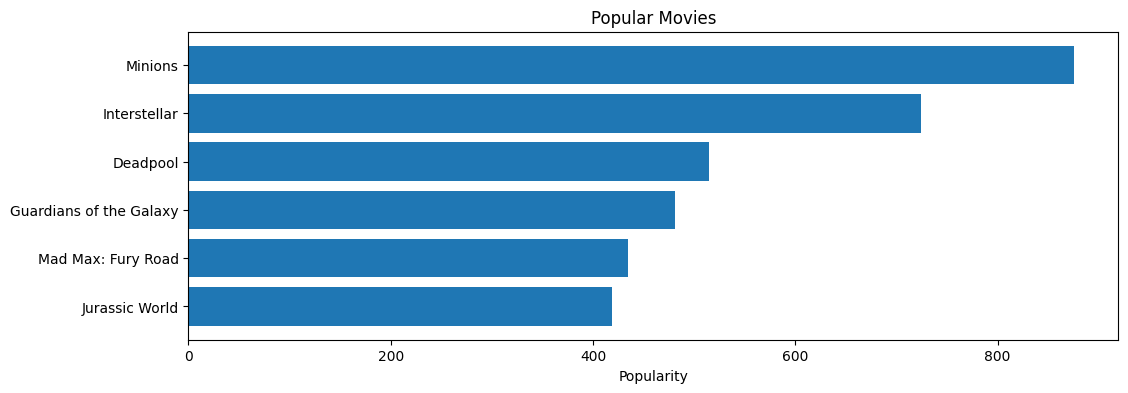

In [17]:
popular = movies_df.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))
plt.barh(popular['original_title'].head(6), popular['popularity'].head(6), align='center')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

_____

## Content based Filtering

This recommender is used to find similar movies based on the details of the movie provided. This can be done with help of movies columns such as overview, cast, crew, keyword, tagline etc.

In [18]:
movies_df['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Now we will use **Term Frequency - Inverse Document Frequency** (TF-IDF) vectors for each overview


In [19]:
# importing Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Initalize and remove all the stop words such as 'the', 'a', 'and'

In [20]:
tfidf = TfidfVectorizer(stop_words='english')

In [21]:
movies_df['overview'] = movies_df['overview'].fillna('')

In [22]:
tfidf_matrix = tfidf.fit_transform(movies_df['overview'])

In [23]:
tfidf_matrix.shape

(4803, 20978)

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. <br />

![Cosine Similarity formula.png](<attachment:Cosine Similarity formula.png>)

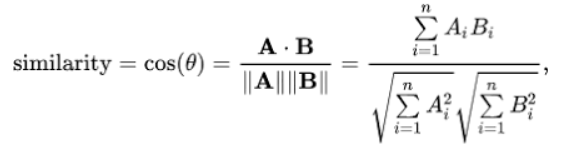

We will use **linear_kernel()** instead of cosine similarities() as its faster

In [24]:
from sklearn.metrics.pairwise import linear_kernel

In [25]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [26]:
indices = pd.Series(movies_df.index, index=movies_df['original_title']).drop_duplicates()

we will define a recommendation function

In [27]:
def get_recommendation(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return movies_df['original_title'].iloc[movie_indices]

In [28]:
get_recommendation('Interstellar')

1709                           キャプテンハーロック
300                     Starship Troopers
4353                    The Green Inferno
220                            Prometheus
2260                      All Good Things
268                         Stuart Little
1352                              Gattaca
4176    Battle for the Planet of the Apes
2648                       Winnie Mandela
634                            The Matrix
Name: original_title, dtype: object

In [29]:
get_recommendation('Battle for the Planet of the Apes')

82      Dawn of the Planet of the Apes
278                 Planet of the Apes
3899    Beneath the Planet of the Apes
920                              Congo
1224               Final Destination 5
4558    Alleluia! The Devil's Carnival
1200              The Living Daylights
1633                       Ultraviolet
335     Rise of the Planet of the Apes
2575            The Hills Have Eyes II
Name: original_title, dtype: object

____
## Credits, Genre based Recommendation System

We will use literal_eval to prevent the execution of arbitary code that might contain a string. 

In [30]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']

for feature in features:
    movies_df[feature] = movies_df[feature].apply(literal_eval)

lets write a function that will help us get the exact required information for each feature

In [31]:
# Get the director's name from the crew feature.
# If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == "Director":
            return i['name']
    return np.nan

In [32]:
# return the top 3 elements in the list
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]

        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [33]:
# Defining the new director, cast, genres and keywords

movies_df['director'] = movies_df['crew'].apply(get_director)

features = ['cast','keywords','genres']
for feature in features:
    movies_df[feature] = movies_df[feature].apply(get_list)

In [34]:
# printint the first 3 features
movies_df[['original_title','cast', 'director','keywords','genres']].head(3)

,original_title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


Now we will trim the names convert all strings to lowercase

In [35]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

Applying the clean data

In [36]:
features = ['cast','keywords', 'director','genres']

for feature in features:
    movies_df[feature] = movies_df[feature].apply(clean_data)

lets create a metadata soup, which will contain all the feeds we want in our vectorizer like actores, directors, keywords, etc.

In [37]:
def soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

movies_df['soup'] = movies_df.apply(soup, axis=1)

In this one we will use CountVectorizer instead of TF-IDF. This is done so that we don't miss the presence of an actor or director.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
count = CountVectorizer(stop_words='english')

In [40]:
count = count.fit_transform(movies_df['soup'])

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count, count)

In [42]:
movies_df.reset_index()
indices = pd.Series(movies_df.index, index=movies_df['original_title'])

In [43]:
# recommendation with genres and other keywords
get_recommendation('The Dark Knight', cosine_sim2)

3          The Dark Knight Rises
119                Batman Begins
4638    Amidst the Devil's Wings
2398                      Hitman
1720                    Kick-Ass
1740                  Kick-Ass 2
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
Name: original_title, dtype: object

In [44]:
# Old recommendation
get_recommendation('The Dark Knight')

3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
1359                                     Batman
119                               Batman Begins
1181                                        JFK
9            Batman v Superman: Dawn of Justice
2507                                  Slow Burn
210                              Batman & Robin
Name: original_title, dtype: object

_____
# Collaborative filtering

This is user based filtering, where the rating of all the users for each film the watch will ber considered and the recommendation will be distinct for every single user.

| | The Avengers | Transformers | Titanic | Sherlock |
|----|----|----|----|----|
| User Name ||| ||
|----|----|----|----|----|
| A | 2 | 2 | 5 | no rating |
| B | 5 | 4 | 2 | 3 |
| C | 3 | 2 | no rating | 5 |

In the above table we can se that User A doesnot like scifi movies and like romantic movies. <br/>
whereas, User B likes scifi movies and doesn't like romantic movie and has average interest in detective movies.

We can use Root Mean Square Error (RMSE) where the lower the number of RMSE the better the performance.

In [45]:
from surprise import Dataset, Reader, SVD

In [46]:
reader = Reader()

In [48]:
ratings = pd.read_csv('ratings_small.csv')

In [49]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [52]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [53]:
svd = SVD()

In [54]:
from surprise.model_selection import cross_validate 

In [55]:
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9013  0.9005  0.8889  0.8896  0.8996  0.8960  0.0055  
MAE (testset)     0.6946  0.6902  0.6855  0.6833  0.6937  0.6894  0.0045  
Fit time          1.54    1.29    1.12    1.11    0.92    1.20    0.21    
Test time         0.17    0.31    0.16    0.11    0.21    0.19    0.06    


In [56]:
trainset = data.build_full_trainset()
svd.fit(trainset)

lets check ratings by userID

In [57]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [58]:
svd.predict(1,302,3)

Prediction(uid=1, iid=302, r_ui=3, est=2.538192439402381, details={'was_impossible': False})